In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import seaborn as sns

%matplotlib inline

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from IPython.display import Image

print("Available Pandas Datasets", gpd.datasets.available)

Available Pandas Datasets ['naturalearth_cities', 'naturalearth_lowres', 'nybb']


In [94]:
Flight_Data = pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\UK_FLIGHT_DATA.csv")
Flight_Data.columns
df_flight_data= Flight_Data

In [95]:
#Edge_List = Flight_Data[Flight_Data['Source Country'].str.contains('USA') & Flight_Data['Target Country'].str.contains('USA')]

In [96]:
Edge_List=Flight_Data.groupby(['Source','Target']).sum('Weight').reset_index()

Edge_List

,Source,Target,Weight
0,ABZ,BFS,437
1,ABZ,BHX,3969
2,ABZ,EMA,1387
3,ABZ,GLA,1782
4,ABZ,HUY,2109
...,...,...,...
352,WIC,EDI,918
353,WIC,KOI,918
354,WRY,KOI,176
355,WRY,PPW,176


In [97]:
Airport_Data = pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\UK_AIRPORT_DATA.csv")
Airport_Data.columns

Index(['id', 'label', 'country', 'Lat ', 'Lon'], dtype='object')

In [98]:
Airport_Data

,id,label,country,Lat,Lon
0,ABZ,Aberdeen (GB),United Kingdom,57.200000,-2.200000
1,ACI,Alderney,United Kingdom,49.700000,-2.216667
2,ADX,Leuchars,United Kingdom,56.366667,-2.866667
3,BBP,Bembridge,United Kingdom,50.683333,-1.083333
4,BBS,Blackbushe,United Kingdom,51.330556,-0.844444
...,...,...,...,...,...
130,XQH,Railway Station,United Kingdom,52.966667,-1.166667
131,YEO,Yeovilton,United Kingdom,51.016667,-2.633333
132,ZBC,Colmore Row Bus Stn,United Kingdom,52.466667,-1.916667
133,ZIV,ScotRail,United Kingdom,57.083333,-4.666667


In [99]:
longitudes = Airport_Data["Lon"].tolist()
latitudes = Airport_Data["Lat "].tolist()

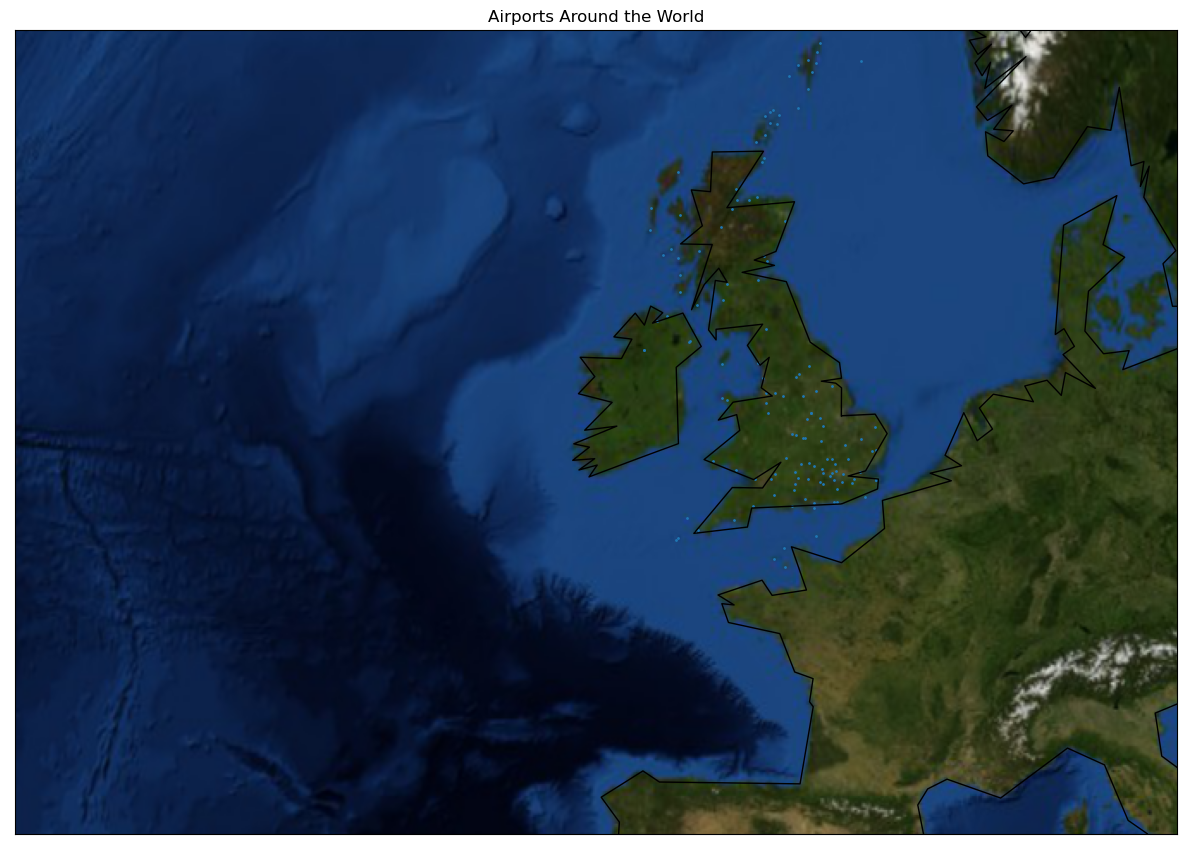

In [100]:
fig, ax = plt.subplots(figsize=(15,20))
plt.title("Airports Around the World")
m = Basemap(projection='merc', llcrnrlon=-32,
         llcrnrlat=42,
         urcrnrlon=13,
         urcrnrlat=61,)
x, y = m(longitudes, latitudes)
m.scatter(x,y,s=1)
m.drawcoastlines()
m.bluemarble()
plt.show()

In [101]:
Graph=nx.from_pandas_edgelist(Edge_List, source= 'Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph)


In [102]:
Graph=nx.from_pandas_edgelist(Edge_List, source= 'Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph)

Total_Nodes= Graph.nodes()
Total_Nodes= pd.DataFrame(Total_Nodes)

Nodes_United_Kingdom = pd.DataFrame(columns = ['id','label','country','Latitude','Longitude'])
Nodes_United_Kingdom['id'] = Total_Nodes
len(Graph.nodes())

60

In [73]:
Graph=Graph.to_undirected()

NetworkXNotImplemented: not implemented for directed type

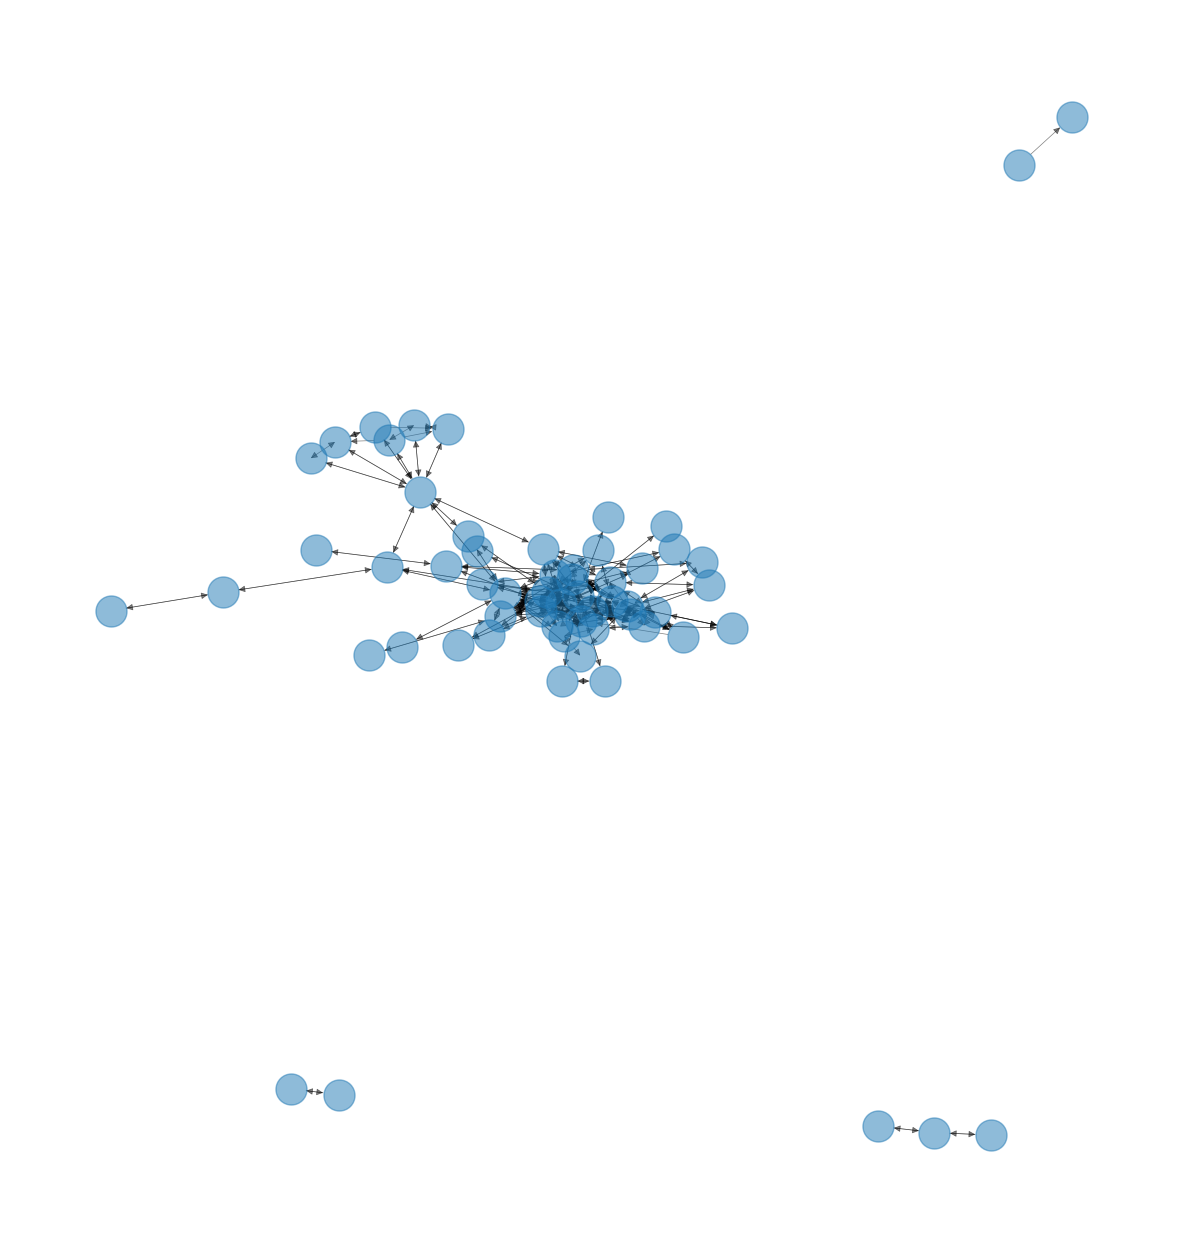

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(15, 16))
nx.draw_networkx(Graph, ax=ax, with_labels=False,
                 node_size=500,alpha=0.5, width=.5)
ax.set_axis_off()

In [104]:
mx, my = m(Airport_Data[ 'Lon'].values, Airport_Data[ 'Lat '].values)
pos = {}
for count, elem in enumerate (Airport_Data['id']):
    pos[elem] = (mx[count], my[count])

In [105]:

Airport_Data= pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\CHINA_AIRPORT_DATA.csv")

for i, row in Nodes_United_Kingdom.iterrows():
    for j, row in Airport_Data.iterrows():
        
         if Nodes_United_Kingdom.loc[i].at["id"]== Airport_Data.loc[j].at["id"]:
            Nodes_United_Kingdom.loc[i].at["label"] = Airport_Data.loc[j].at["label"] 
            Nodes_United_Kingdom.loc[i].at["country"] = Airport_Data.loc[j].at["country"]
            Nodes_United_Kingdom.loc[i].at["Latitude"] = Airport_Data.loc[j].at["Lat "]
            Nodes_United_Kingdom.loc[i].at["Longitude"] = Airport_Data.loc[j].at["Lon"]
            break
            
#Nodes_United_Kingdom.to_csv('C:\Users\Avishaek\Downloads\Sorted Data\Nodes_Australia.csv') 


In [106]:
Airport_Data

,id,label,country,Lat,Lon
0,AAT,Altay,China,46.396120,95.845044
1,ACX,Xingyi,China,25.090418,104.890021
2,AEB,Baise,China,23.900000,106.600000
3,AKA,Ankang,China,32.679981,109.020002
4,AKU,Aksu,China,41.150006,80.250026
...,...,...,...,...,...
239,ZUH,Zhuhai,China,22.276944,113.567778
240,ZYI,Zunyi,China,27.700026,106.920026
241,ZYK,Shekou Port,China,30.700000,114.350000
242,HKG,Hong Kong,Hong Kong (sar) China,22.308889,113.914722


In [107]:
deg = nx.degree(Graph)
sizes = [5 * deg[id] for id in Graph.nodes]

In [108]:
Weight = Flight_Data['Weight']
Weight = [Weight[id] for id in Graph.nodes]

KeyError: 'ABZ'

NetworkXError: Node 'ABZ' has no position.

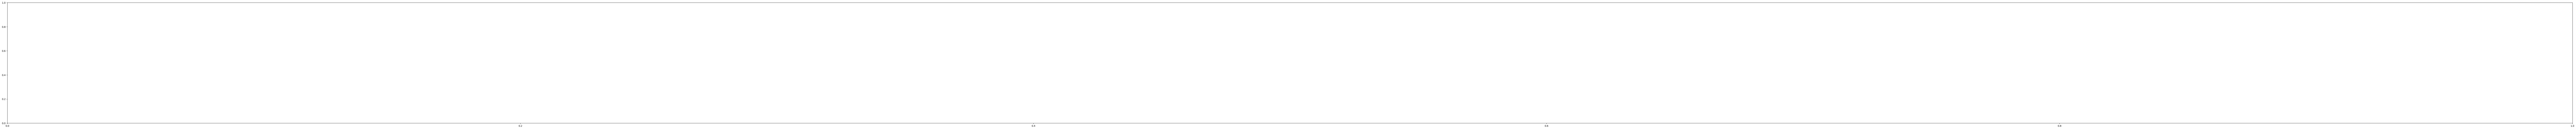

In [109]:
plt.figure(figsize = (190,9))
m = Basemap(projection='merc',  llcrnrlon=-32,
         llcrnrlat=42,
         urcrnrlon=13,
         urcrnrlat=61,resolution='c')
#suppress_ticks=True)


mx, my = m(Airport_Data[ 'Lon'].values, Airport_Data[ 'Lat '].values)
pos = {}

for count, elem in enumerate (Airport_Data['id']):
    pos[elem] = (mx[count], my[count])
    
nx.draw_networkx_nodes(G = Graph, pos = pos, node_color = 'r', alpha = 0.8, node_size = 5)
nx.draw_networkx_edges(G = Graph, pos = pos, edge_color='y',
alpha=0.2, arrows = True)
#m.drawcountries(Linewidth = @.1)
#m.drawstates(Linewidth = @.2)
#m.drawcoastlines(Linewidth=3)
m.bluemarble()
plt.tight_layout()
#pLt.savefig("./tmages/map_1.png", format = "png", dpi = 300)
plt.savefig( 'USA_Network.png' )
plt.show()

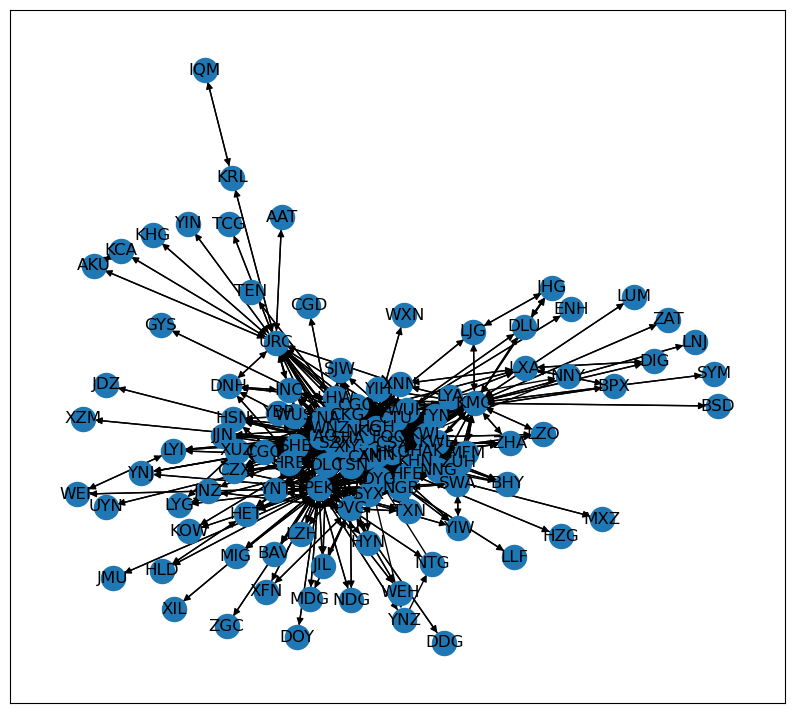

In [29]:
plt.figure(figsize = (10,9))
nx.draw_networkx(Graph)

In [31]:
 plt.figure(figsize = (10,9))
 m = Basemap(
         projection='merc',
         llcrnrlon=73,
         llcrnrlat=18,
         urcrnrlon=135,
         urcrnrlat=53,
         lat_ts=0,
         resolution='l',
         suppress_ticks=True)


<Figure size 1000x900 with 0 Axes>